In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# fourier mesh
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


def mesh_fourier(zmin,zmax,nz):
    dz = np.zeros((nz,nz))    
    for i in range(nz) : 
            for j in range(nz) :
                    if i == j: 
                        dz[i,i]=0
                        
                    else:
                        dz[i,j]=np.pi*(-1)**((i-1)+(j-1))/(zmax-zmin)/np.tan(((i-1)-(j-1))*np.pi/(nz))
            
    return dz


In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# function BXL equations
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def Bxl(a,b,U,V):
    dU = a-(b+1)*U+U**2*V
    dV = b*U-U**2.*V
    return [dU, dV]


In [4]:
# Physical size of the system
L=70;
# Parameters
D1=2.8
D2=22.4
oscillatory=False

In [5]:
if oscillatory==False:
     a=1.5
    # Critical parameter for stationary instability: bc=2.34
    # Interesting values to try:
    #   - just below onset b=2.3
    #   - just above onset b=2.4
    #   - far above onset b=3.0
     b=2.4
else:
    a0 = 2* np.sqrt(D2*D1)/(D2-D1)
    a = 0.75; 
    if a>a0 :
        print('Oscillatory instability requires a < %f',a0)
    b=1.6
    bo=1+a**2 
    bc=(1+a*np.sqrt(D1/D2))**2
    if b<bo or b>bc:
          print('Oscillatory instability requires %f <  b < %f',bo,bc)
   

In [6]:
c=b/a

In [7]:
# Spatial resolution:
#   - increase to improve performance,
#   - decrease to increase speed 
N=64


# Timestep (has to be no more than 0.01 close to onset)
deltat=0.01
t_end = 1000
t_save = 1

# Initial condition
if 0==0:
    t=0
    U=a*np.ones(N)+0.001*np.random.standard_normal(N)
    V=c*np.ones(N)+0.001*np.random.standard_normal(N)
    Ut=[]
    # Ut=[t log(norm(U-a*ones(N))/N)];




In [8]:

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# spatial simulation
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

dz = mesh_fourier(0,L,N)

dz2 = np.dot(dz,dz)



# initial conditions
u = a*np.ones(N)+0.001*np.random.standard_normal(N)
v = c*np.ones(N)+0.001*np.random.standard_normal(N)


# arrays to save the solution
U_arr = np.zeros((N,round(t_end/t_save)))
V_arr = np.zeros((N,round(t_end/t_save)))
time_arr = np.zeros((N,round(t_end/t_save)))
space_arr = np.zeros((N,round(t_end/t_save)))

# solver
counter = 0  #useless ("i" does the job)
counter2 = 0
for i in range(1,round(t_end/deltat)+1):
   
    counter = counter +1
    
    # solve BXL equations 
    [du, dv] = Bxl(a,b,u,v)
    u = u + deltat*(du + D1*np.dot(dz2,u))

    v = v + deltat*(dv + D2*np.dot(dz2,v))
    t = i*deltat
    
    


    # save output
    if  t%t_save ==0 :
        counter = 0
        time_arr[:,counter2] = np.ones(N)*t
        space_arr[:,counter2] = np.linspace(1,N,N)*(L/N)
        U_arr[:,counter2] = u 
        V_arr[:,counter2] = v 
        counter2 = counter2 +1


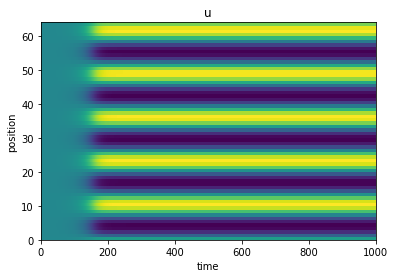

In [9]:
fig=plt.figure()
plt.pcolor(U_arr)
plt.title('u')
plt.xlabel('time')
plt.ylabel('position')
plt.show()

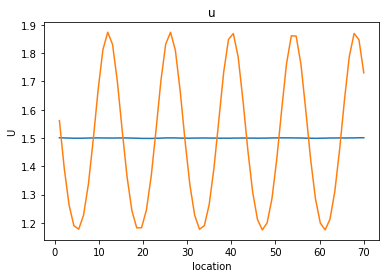

In [10]:
fig=plt.figure()
plt.plot(np.linspace(1,N,N)*(L/N),U_arr[:,0])
plt.plot(np.linspace(1,N,N)*(L/N),U_arr[:,999])
plt.title('u')
plt.xlabel('location')
plt.ylabel('U')
plt.show()
